In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df=pd.read_csv('Unemployment in India.csv')

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [12]:
df1=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [13]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [15]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [16]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [18]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [20]:
df.columns=df.columns.str.strip()
df1.columns=df1.columns.str.strip()

df = pd.merge(df,df1,on=['Date','Region'], how='inner')

In [21]:
df

,Region,Date,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,31-01-2020,Monthly,7.11,4618860.0,35.91,Urban,M,5.48,16635535,41.02,South,15.9129,79.7400
2,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural,M,5.83,16545652,40.90,South,15.9129,79.7400
3,Andhra Pradesh,29-02-2020,Monthly,5.66,4822035.0,36.84,Urban,M,5.83,16545652,40.90,South,15.9129,79.7400
4,Andhra Pradesh,31-03-2020,Monthly,4.06,11359660.0,40.66,Rural,M,5.79,15881197,39.18,South,15.9129,79.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Puducherry,31-05-2020,Monthly,75.00,64538.0,31.25,Urban,M,58.19,172308,33.19,South,11.9416,79.8083
302,Puducherry,30-06-2020,Monthly,4.55,234926.0,29.73,Urban,M,4.24,367135,30.80,South,11.9416,79.8083
303,Sikkim,31-03-2020,Monthly,20.45,86186.0,50.57,Urban,M,23.57,262895,60.59,Northeast,27.5330,88.5122
304,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban,M,24.51,193427,44.88,Northeast,27.5330,88.5122


In [22]:
df=df.rename(columns={
    'Frequency_x':'Frequency',
    'Estimated Unemployment Rate (%)_x':'Unemployment Rate_x',
    'Estimated Employed_x':'Employed_x',
    'Estimated Labour Participation Rate (%)_x':'Labour Participation Rate_x',
    'Frequency_y':'Frequency',
    'Estimated Unemployment Rate (%)_y':'Unemployment Rate_y',
    'Estimated Employed_y':'Employed_y',
    'Estimated Labour Participation Rate (%)_y':'Labour Participation Rate_y'
})

In [23]:
df

,Region,Date,Frequency,Unemployment Rate_x,Employed_x,Labour Participation Rate_x,Area,Frequency,Unemployment Rate_y,Employed_y,Labour Participation Rate_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,31-01-2020,Monthly,7.11,4618860.0,35.91,Urban,M,5.48,16635535,41.02,South,15.9129,79.7400
2,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural,M,5.83,16545652,40.90,South,15.9129,79.7400
3,Andhra Pradesh,29-02-2020,Monthly,5.66,4822035.0,36.84,Urban,M,5.83,16545652,40.90,South,15.9129,79.7400
4,Andhra Pradesh,31-03-2020,Monthly,4.06,11359660.0,40.66,Rural,M,5.79,15881197,39.18,South,15.9129,79.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Puducherry,31-05-2020,Monthly,75.00,64538.0,31.25,Urban,M,58.19,172308,33.19,South,11.9416,79.8083
302,Puducherry,30-06-2020,Monthly,4.55,234926.0,29.73,Urban,M,4.24,367135,30.80,South,11.9416,79.8083
303,Sikkim,31-03-2020,Monthly,20.45,86186.0,50.57,Urban,M,23.57,262895,60.59,Northeast,27.5330,88.5122
304,Sikkim,31-05-2020,Monthly,19.75,75456.0,43.32,Urban,M,24.51,193427,44.88,Northeast,27.5330,88.5122


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       306 non-null    object 
 1   Date                         306 non-null    object 
 2   Frequency                    306 non-null    object 
 3   Unemployment Rate_x          306 non-null    float64
 4   Employed_x                   306 non-null    float64
 5   Labour Participation Rate_x  306 non-null    float64
 6   Area                         306 non-null    object 
 7   Frequency                    306 non-null    object 
 8   Unemployment Rate_y          306 non-null    float64
 9   Employed_y                   306 non-null    int64  
 10  Labour Participation Rate_y  306 non-null    float64
 11  Region.1                     306 non-null    object 
 12  longitude                    306 non-null    float64
 13  latitude            

In [25]:
df.describe()

,Unemployment Rate_x,Employed_x,Labour Participation Rate_x,Unemployment Rate_y,Employed_y,Labour Participation Rate_y,longitude,latitude
count,306.000000,3.060000e+02,306.000000,306.000000,3.060000e+02,306.000000,306.000000,306.000000
mean,15.085523,6.987533e+06,40.923856,14.170229,1.407279e+07,41.487680,22.832456,80.479321
std,13.623182,7.869803e+06,8.800755,12.352776,1.315823e+07,8.385149,6.199307,5.771207
min,0.000000,4.942000e+04,13.330000,0.580000,1.175420e+05,16.770000,10.850500,71.192400
25%,5.380000,1.445030e+06,36.382500,5.502500,3.229258e+06,37.382500,18.112400,76.085600
50%,10.740000,4.574052e+06,39.530000,10.580000,9.975485e+06,40.395000,23.610200,79.019300
75%,20.370000,1.074515e+07,44.242500,18.732500,2.050661e+07,44.205000,27.023800,85.098500
max,76.740000,4.577751e+07,72.260000,75.850000,5.943376e+07,69.690000,33.778200,92.937600


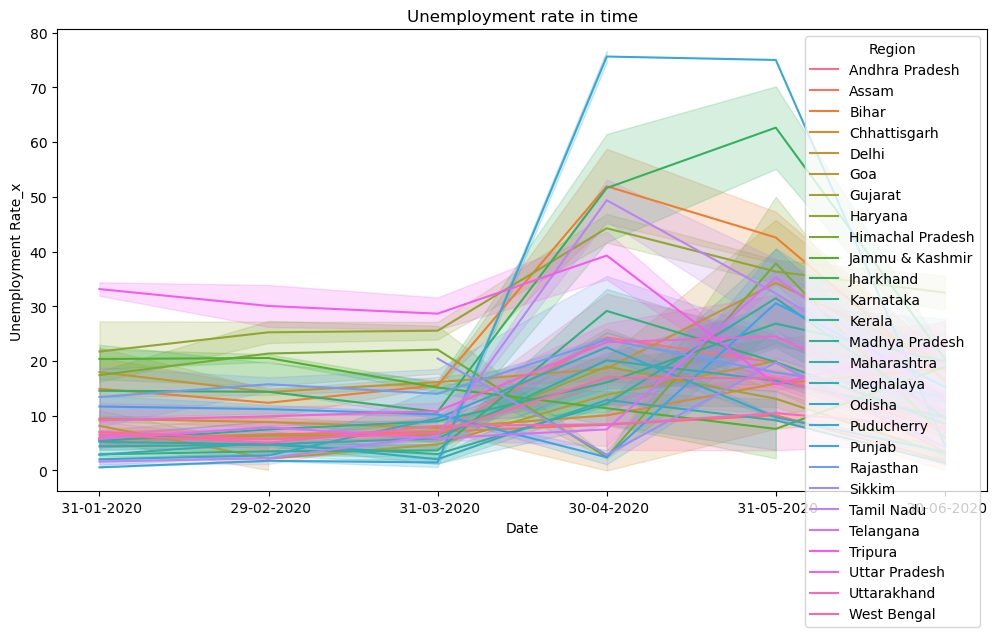

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Unemployment Rate_x', hue='Region',data=df)
plt.title('Unemployment rate in time')
plt.show()

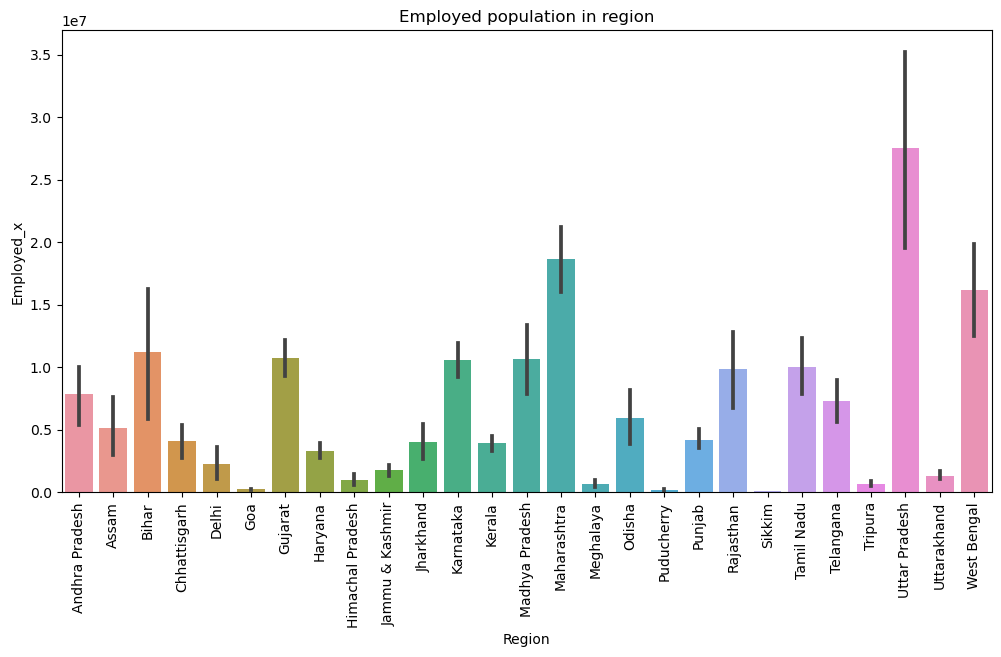

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region',y='Employed_x',data=df)
plt.title('Employed population in region')
plt.xticks(rotation=90)
plt.show()

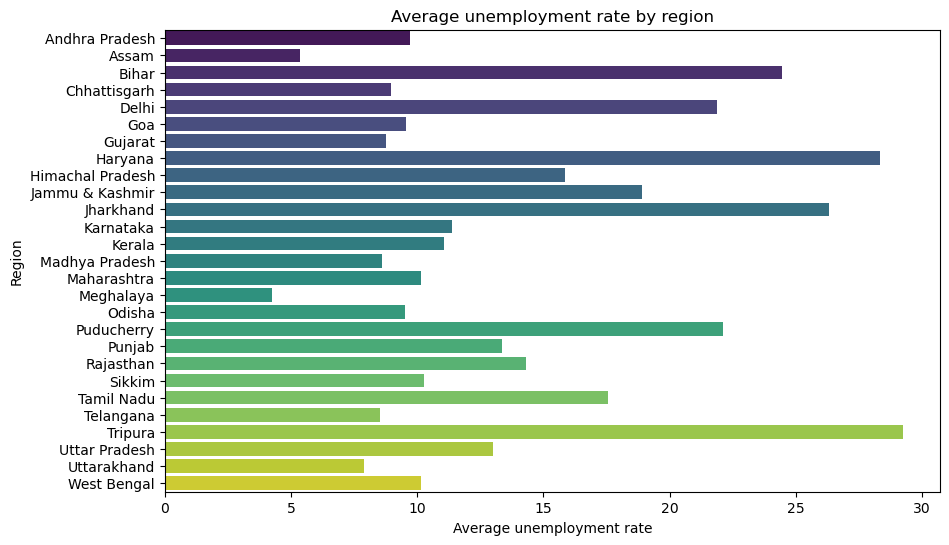

In [43]:
plt.figure(figsize=(10,6))
unemployment=df.groupby('Region')['Unemployment Rate_y'].mean()
sns.barplot(x=unemployment.values,y=unemployment.index,palette='viridis')
plt.title('Average unemployment rate by region')
plt.xlabel('Average unemployment rate')
plt.ylabel('Region')
plt.show()

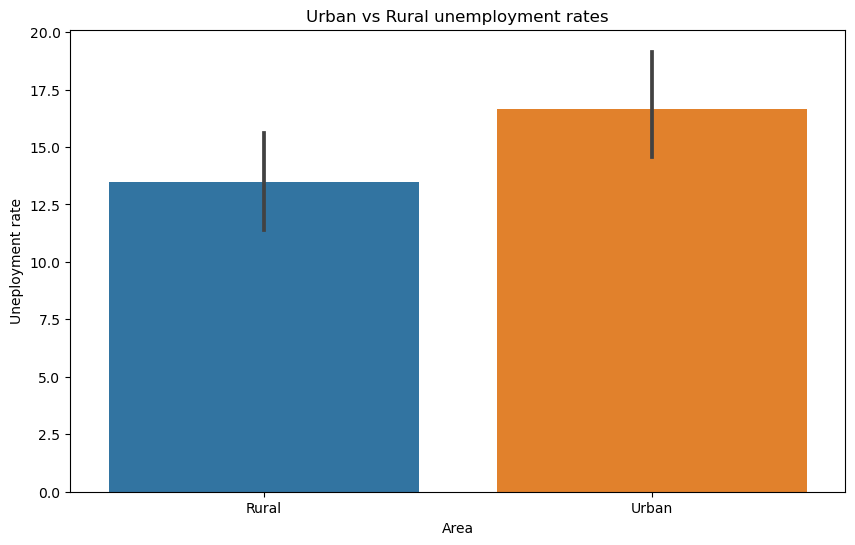

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Area',y='Unemployment Rate_x',data=df)
plt.title('Urban vs Rural unemployment rates')
plt.xlabel('Area')
plt.ylabel('Uneployment rate')
plt.show()

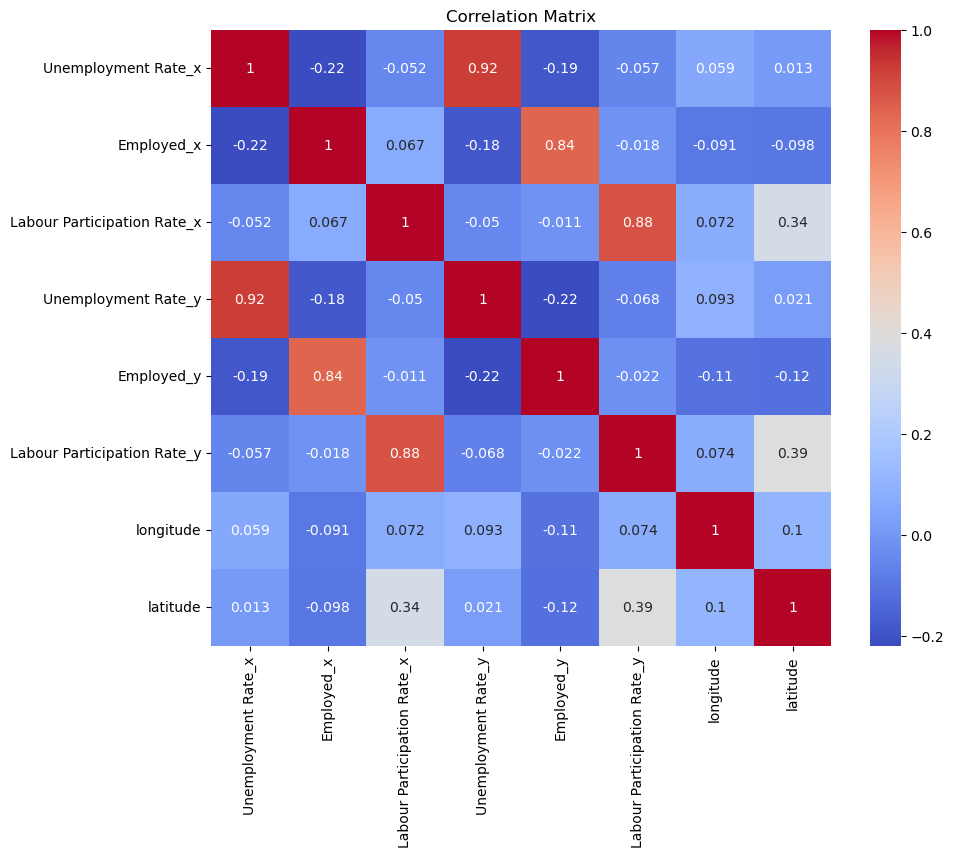

In [46]:
numeric_cols=df.select_dtypes(include=['float64','int64']).columns
corr_matrix=df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

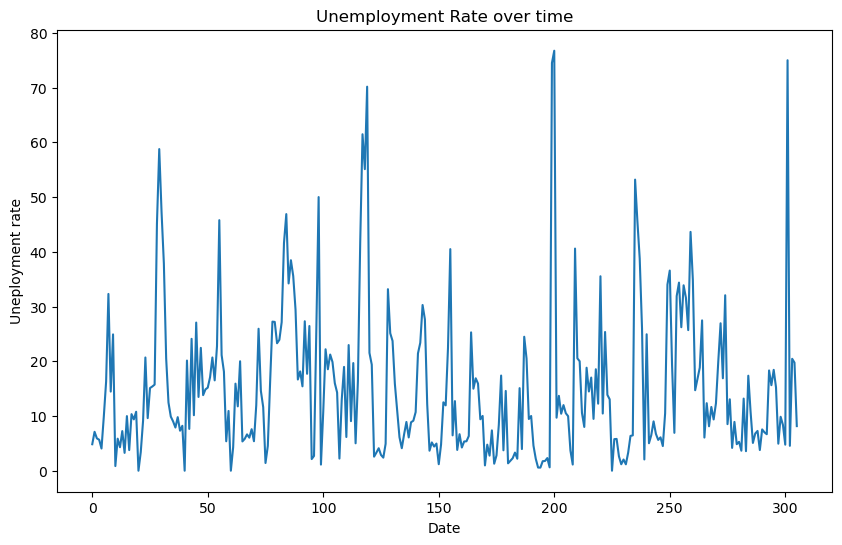

In [47]:
plt.figure(figsize=(10,6))
plt.plot(df['Unemployment Rate_x'])
plt.title('Unemployment Rate over time')
plt.xlabel('Date')
plt.ylabel('Uneployment rate')
plt.show()